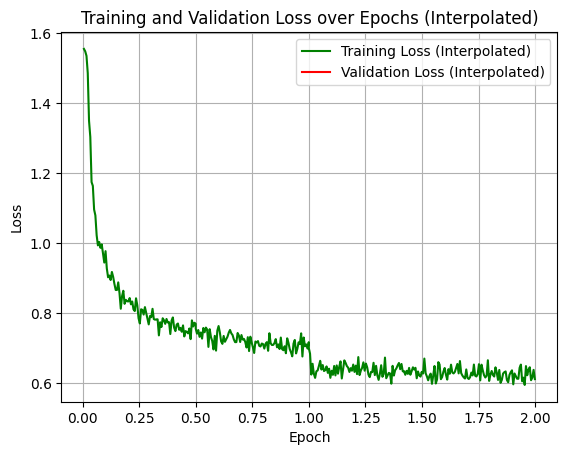

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


with open('/home/zhuyao/Sunpeng/llava_qwen/check_point/downstream_tasks/cot/trainer_state.json', 'r') as f:
    trainer_state = json.load(f)

loss_values = []
eval_loss_values = []
epochs = []

for entry in trainer_state['log_history']:
    if 'epoch' in entry:
        epochs.append(entry['epoch'])
    else:
        epochs.append(None) 
    if 'loss' in entry:
        loss_values.append(entry['loss'])
    else:
        loss_values.append(None) 
    if 'eval_loss' in entry:
        eval_loss_values.append(entry['eval_loss'])
    else:
        eval_loss_values.append(None) 

df = pd.DataFrame({
    'epoch': epochs,
    'loss': loss_values,
    'eval_loss': eval_loss_values
})

df_interpolated = df.interpolate(method='linear')

plt.plot(df_interpolated['epoch'], df_interpolated['loss'], 'g-', label='Training Loss (Interpolated)')
plt.plot(df_interpolated['epoch'], df_interpolated['eval_loss'], 'r-', label='Validation Loss (Interpolated)')


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs (Interpolated)')
plt.grid(True)
plt.legend()  
plt.show()
